In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [10]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)

In [11]:
df.sample(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
257,2014,CHEVROLET,SONIC RS,COMPACT,1.4,4,AS6,X,9.4,7.0,8.3,34,191
63,2014,AUDI,SQ5,SUV - SMALL,3.0,6,AS8,Z,14.9,10.1,12.7,22,292
354,2014,FORD,EDGE AWD,SUV - SMALL,3.5,6,AS6,X,13.3,9.3,11.5,25,264
934,2014,SCION,xB,STATION WAGON - SMALL,2.4,4,AS4,X,10.9,8.6,9.9,29,228
379,2014,FORD,F150 FFV,PICKUP TRUCK - STANDARD,5.0,8,A6,X,16.4,12.3,14.6,19,336
30,2014,AUDI,A8,MID-SIZE,3.0,6,AS8,Z,13.1,8.8,11.2,25,258
280,2014,CHRYSLER,200 SEDAN,MID-SIZE,2.4,4,A6,X,12.0,7.6,10.0,28,230
696,2014,MAZDA,CX-5,SUV - SMALL,2.5,4,AS6,X,9.6,7.4,8.6,33,198
511,2014,HYUNDAI,SANTA FE SPORT 4WD,SUV - SMALL,2.0,4,A6,X,12.9,9.7,11.5,25,264
638,2014,LAND ROVER,RANGE ROVER EVOQUE,SUV - SMALL,2.0,4,AS9,Z,11.3,7.9,9.8,29,225


In [12]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [13]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
760,2.1,4,8.5,230
497,1.5,4,7.7,177
545,5.0,8,14.5,334
445,5.3,8,16.5,380
118,4.4,8,14.7,338
898,2.7,6,9.9,228
779,6.2,8,15.7,361
817,2.0,4,8.3,191
6,3.5,6,10.1,232


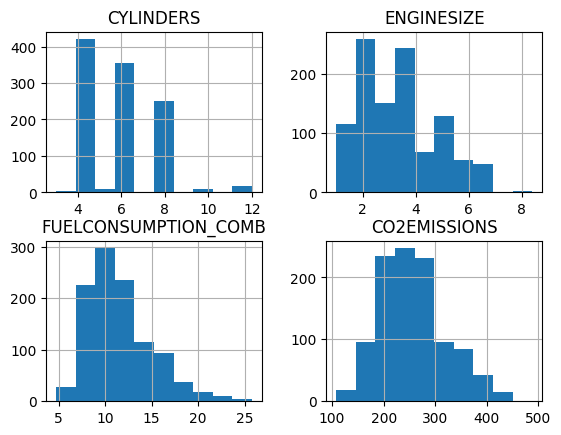

In [14]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

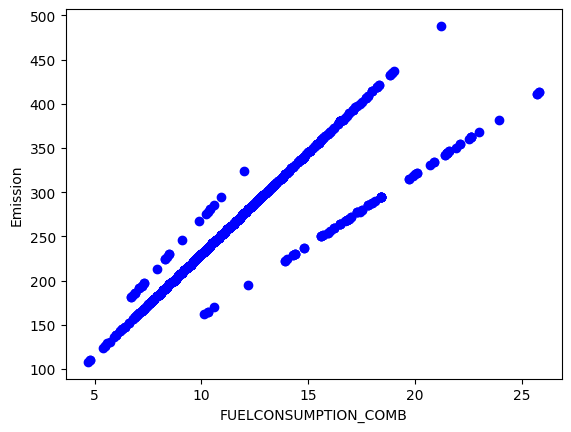

In [15]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

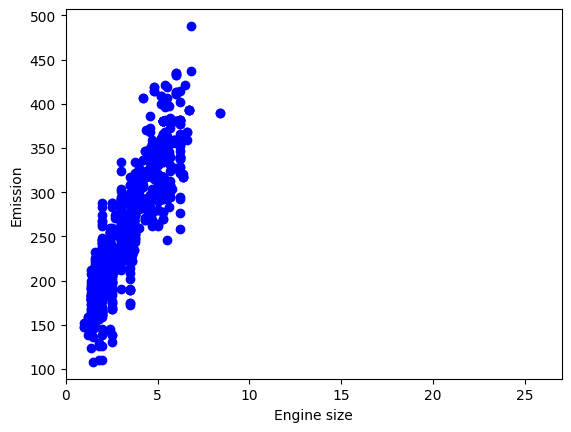

In [16]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

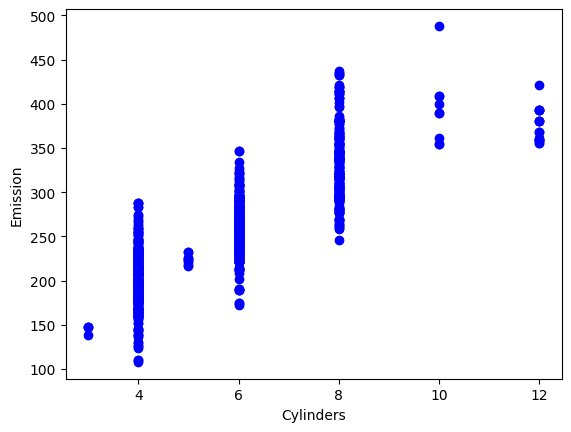

In [17]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

In [24]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (853,), (853,))

In [27]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()

regressor.fit(X_train.reshape(-1,1), y_train)
print('Coefficients: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)

Coefficients:  [39.24838431]
Intercept:  126.18920154724972


Text(0, 0.5, 'Emission')

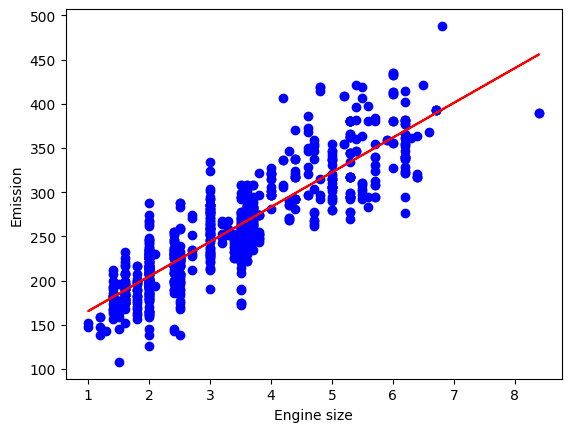

In [28]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

y_test_ = regressor.predict(X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test_, y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test_, y_test))
print("R2-score: %.2f" % r2_score( y_test_, y_test) )

Mean absolute error: 25.57
Mean squared error: 1181.53
Root mean squared error: 34.37
R2-score: 0.63


Text(0, 0.5, 'Emission')

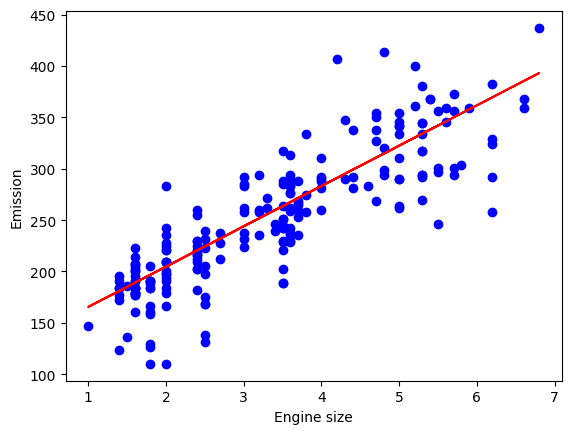

In [30]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [31]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
regr = linear_model.LinearRegression()
regr.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [33]:
y_test_ = regr.predict(X_test.reshape(-1,1))

In [35]:
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))

Mean squared error: 797.43
